In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

[9]


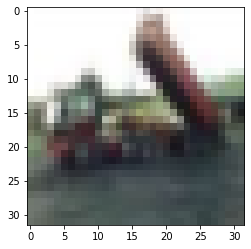

In [8]:
plt.imshow(x_train[2])
print(y_train[2])

/home/rocky/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


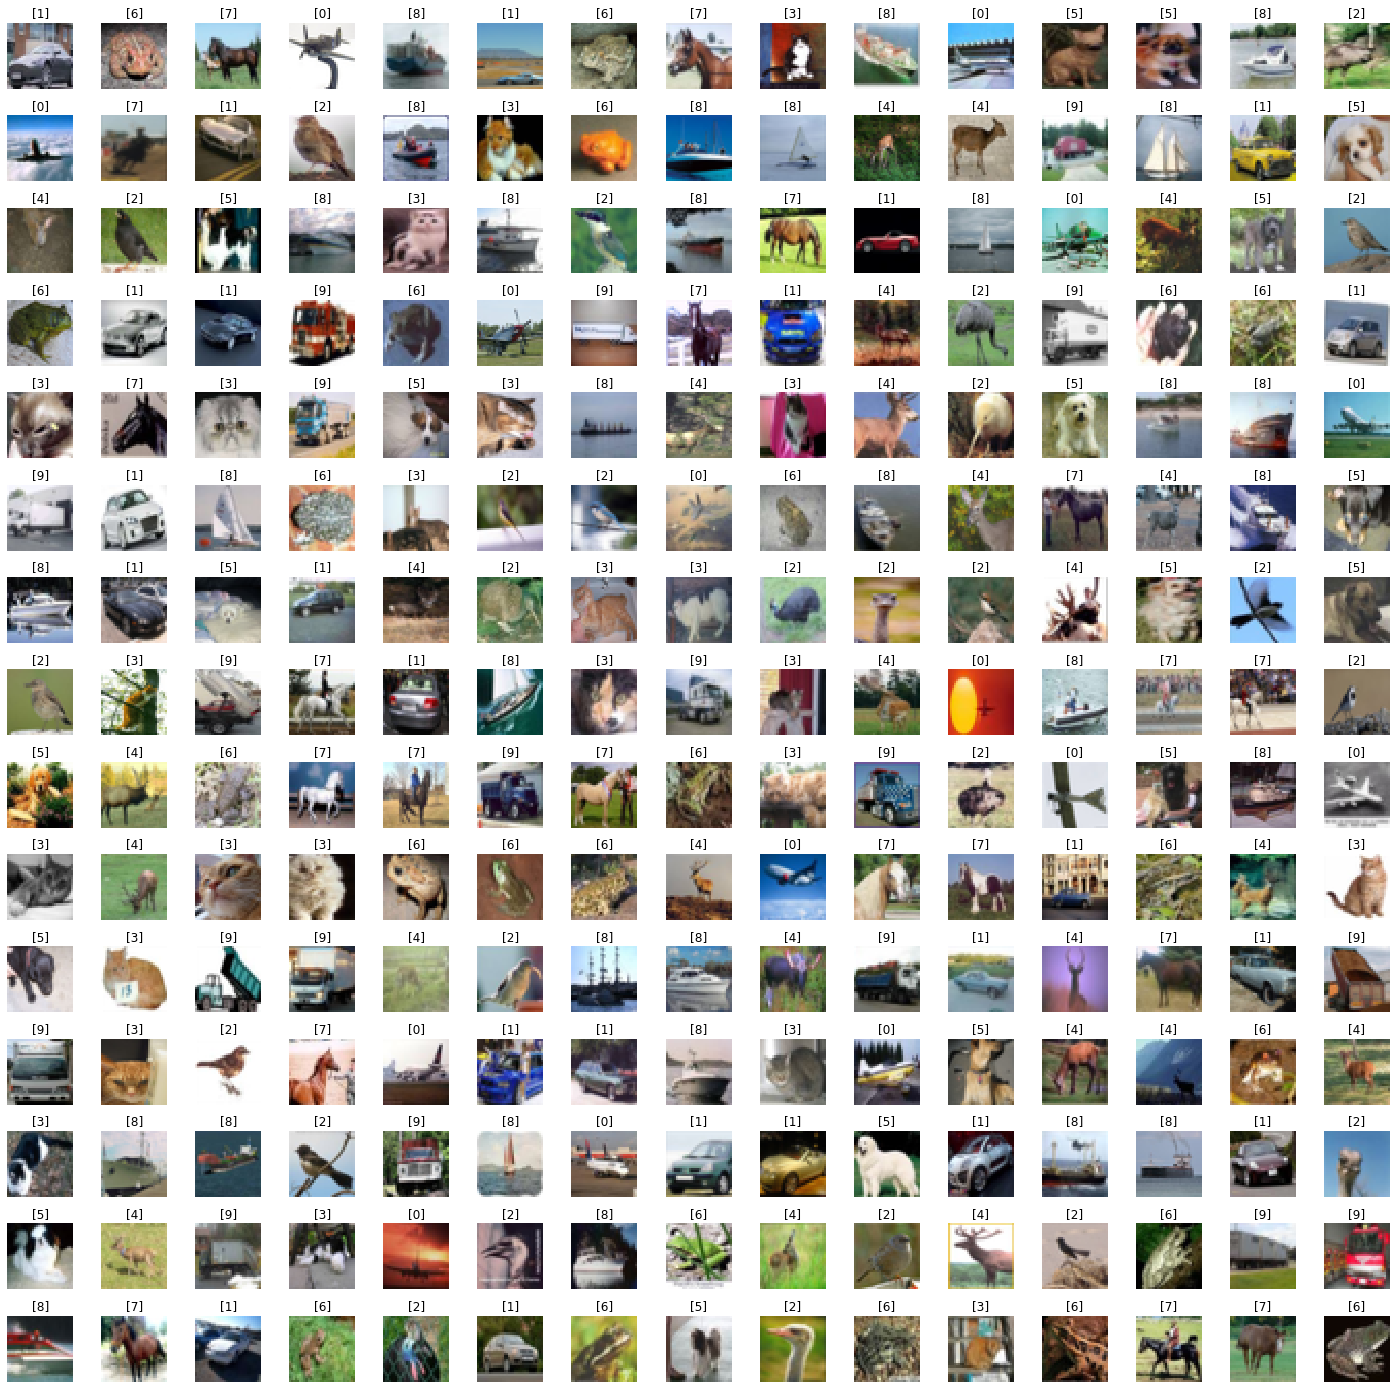

In [9]:
w_grid = 15
l_grid = 15
fig,axes = plt.subplots(l_grid,w_grid,figsize = (25,25))
axes = axes.ravel()
for i in range(0,w_grid*l_grid):
    index = np.random.randint(0,len(x_train))
    axes[i].imshow(x_train[index])
    axes[i].axis("off")
    axes[i].set_title(y_train[index])
plt.subplots_adjust(hspace = 0.4)

In [10]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

In [11]:
num_cat = 10
import keras
y_train = keras.utils.to_categorical(y_train,10)

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
x_train = x_train/255
x_test = x_test/255

In [14]:
x_train.shape

(50000, 32, 32, 3)

In [15]:
input_shape = x_train.shape[1:]

In [16]:
input_shape

(32, 32, 3)

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D,AveragePooling2D
from keras.optimizers import adam
from keras.callbacks import TensorBoard

In [18]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32,kernel_size = (3,3),activation = "relu",input_shape = input_shape))
cnn_model.add(Conv2D(filters = 32,kernel_size = (3,3),activation = "relu"))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

In [19]:
cnn_model.add(Conv2D(filters = 64,kernel_size = (3,3),activation = "relu"))
cnn_model.add(Conv2D(filters = 64,kernel_size = (3,3),activation = "relu"))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

In [20]:
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 512,activation = "relu"))
cnn_model.add(Dense(512,activation="relu"))
cnn_model.add(Dense(10,activation = "softmax"))

In [21]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)         

In [22]:
cnn_model.compile(loss = "categorical_crossentropy",optimizer= keras.optimizers.rmsprop(lr= 0.001),metrics = ["accuracy"])

In [23]:
history = cnn_model.fit(x_train,y_train,batch_size = 32,epochs = 10,shuffle = True)

Epoch 1/10
50000/50000 [==============================] - 590s 12ms/step - loss: 1.5983 - accuracy: 0.4202
Epoch 2/10
50000/50000 [==============================] - 577s 12ms/step - loss: 1.1743 - accuracy: 0.5870
Epoch 3/10
50000/50000 [==============================] - 554s 11ms/step - loss: 1.0420 - accuracy: 0.6415
Epoch 4/10
50000/50000 [==============================] - 554s 11ms/step - loss: 1.0033 - accuracy: 0.6575
Epoch 5/10
50000/50000 [==============================] - 556s 11ms/step - loss: 0.9805 - accuracy: 0.6645
Epoch 6/10
50000/50000 [==============================] - 557s 11ms/step - loss: 0.9651 - accuracy: 0.6742
Epoch 7/10
50000/50000 [==============================] - 557s 11ms/step - loss: 0.9628 - accuracy: 0.6772
Epoch 8/10
50000/50000 [==============================] - 557s 11ms/step - loss: 0.9530 - accuracy: 0.6811
Epoch 9/10
50000/50000 [==============================] - 592s 12ms/step - loss: 0.9433 - accuracy: 0.6823
Epoch 10/10
50000/50000 [============

In [24]:
import keras
y_test= keras.utils.to_categorical(y_test,10)
evaluation = cnn_model.evaluate(x_test,y_test)

10000/10000 [==============================] - 37s 4ms/step


In [27]:
print("test accuracy: {}".format(evaluation[1]))

test accuracy: 0.6621000170707703


In [30]:
predicted_y = cnn_model.predict_classes(x_test)

In [31]:
predicted_y

array([3, 1, 1, ..., 5, 1, 7])

In [32]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [33]:
y_test = y_test.argmax(1)

In [34]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

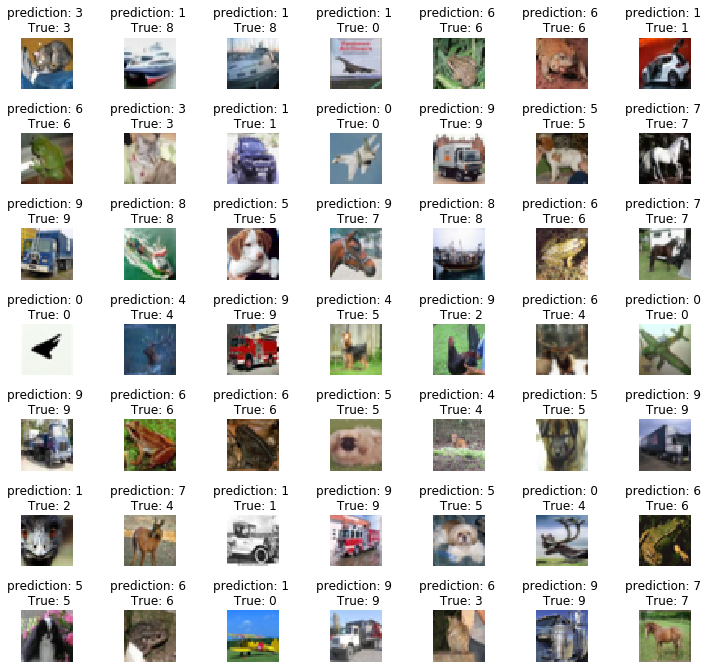

In [37]:
L = 7
W = 7
fig,axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()
for i in range(L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title("prediction: {} \n True: {}".format(predicted_y[i],y_test[i]))
    axes[i].axis("off")
plt.subplots_adjust(wspace = 1)

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted_y)
print(cm)

[[623 157  24   5   7   1   9   8 105  61]
 [  1 963   0   1   0   0   0   0   5  30]
 [ 74  60 467  39  28  40 166  79  27  20]
 [ 28  65  38 440  33  93 168  72  26  37]
 [ 34  48  57  37 421  17 194 151  21  20]
 [ 16  45  32 205  16 498  69  88  13  18]
 [  3  60  14  20  11   5 868   6   8   5]
 [ 17  46  17  15   8  25  32 791   4  45]
 [ 30 166   4   4   1   1   3   6 756  29]
 [  7 171   3   2   0   1   4   3  15 794]]


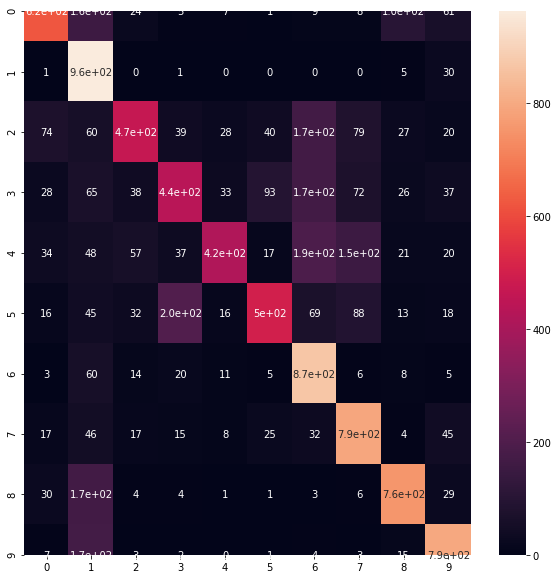

In [46]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,annot = True)